In [1]:
%cd ..
import pandas as pd
from Bio import SeqIO

from scripts.utils_latest import *

pd.options.mode.chained_assignment = None  # Disable the SettingWithCopyWarning warning globally


/run/media/nazif/2F946E411BA61D49/thesis


In [3]:
clash = pd.read_csv("data/processed/clash/clash_parsed.csv")

clash.head()

,id,mirna_sequence,true_start_index,true_end_index,mrna_sequence,true_seed_type,num_basepairs,seed_basepairs,folding_energy,true_folding_class,mirna_accession,mirna_name,ensg,enst,gene_name,full_sequence_of_transcript,extended_sequence,extended_start,extended_end
0,0727A-1038930_1,TGAGGTAGTAGGTTGTATAGTT,1790,1890,ATTTGTATCTACGATAAAAATTTTTATACAGAACCTACTGCCTCAA...,noncanonical_seed,20,6,-25.1,III,MIMAT0000062,let-7a,ENSG00000113328,ENST00000340828,CCNG1,AGGGCAGGCGCGGCCCCTTCGGCTCCGAGCTGACCCTGATCAGGGC...,TTTAATATTTTTTTCTAGAAAACAGGTGACATTTGTATCTACGATA...,1760,1920
1,L1HS-1112536_1,TGAGGTAGTAGGTTGTATAGTT,3856,3928,CAGGAAATACCCGTGCAACCAACTACCTCATATTCCATTCAGAATT...,9-mer,17,6,-24.4,II,MIMAT0000062,let-7a,ENSG00000100697,ENST00000343455,DICER1,CGGAGGCGCGGCGCAGGCTGCTGCAGGCCCAGGTGAATGGAGTAAC...,TGCCAAGGAAATCAGCTAAATTACTACAAGCAGGAAATACCCGTGC...,3826,3958
2,L2HS-818542_2,TGAGGTAGTAGGTTGTATAGTT,2384,2434,ACCCGCTATATGACCTGATGCCTTTCCTTCATTAAAGATGATTCTG...,noncanonical_seed,19,6,-22.2,III,MIMAT0000062,let-7a,ENSG00000080546,ENST00000436639,SESN1,GATTGCCAGGGCCGCCCTGTGCCCTCTGGCTCGGCGGTGGTGGGCG...,GCAGAACTCCTTTATGCTCTGAGAGCCATTACCCGCTATATGACCT...,2354,2464
3,L2HS-1161339_2,TGAGGTAGTAGGTTGTATAGTT,6569,6623,CAATGACTATGCAACCATACCTTACCACTAAATGTAGTACGCAAAA...,noncanonical_seed,18,6,-22.1,III,MIMAT0000062,let-7a,ENSG00000164190,ENST00000282516,NIPBL,TCCGGTCGGCATTTTGTTCTGAGAGGGAGAGACGGAACGAGAGAGA...,AAATAAGACCCCAGCTCATGGTTAAACATGCAATGACTATGCAACC...,6539,6653
4,L2-407944_2,TGAGGTAGTAGGTTGTATAGTT,1163,1208,AATACTGGGAAACCTGCTACTTCGTCAGCTAACCAGAAACCTGTG,noncanonical_seed,18,6,-21.9,III,MIMAT0000062,let-7a,ENSG00000138785,ENST00000340139,INTS12,AGGGACCACCGGGAACAGACGGATCGGCAGGGCGGGGCGGAACGGT...,ACAGCAAAATTGAGTTCAACAACACAAAACAATACTGGGAAACCTG...,1133,1238


In [6]:
clash.mrna_sequence.str.len().median()

50.0

<Axes: >

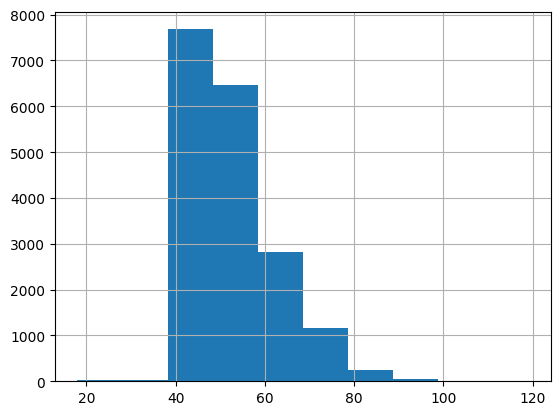

In [7]:
clash.mrna_sequence.str.len().hist()

In [2]:
df = pd.read_csv("data/sample_vcfs/PD3851a.vcf", sep="\t", header=None)
df.columns = ["chr", "pos", "unknown", "ref", "alt"]
df.head()

,chr,pos,unknown,ref,alt
0,1,809687,PD3851a,G,C
1,1,819245,PD3851a,G,T
2,1,1911011,PD3851a,C,G
3,1,2112413,PD3851a,T,C
4,1,2927666,PD3851a,A,G


In [3]:
print(get_nucleotide_at_position(1, 809687))
print(get_nucleotide_at_position(1, 809688))
print(get_nucleotide_at_position(1, 809689))


G
G
A


In [4]:
chr1 = df[df['chr'] == '1']
chr1.head()

,chr,pos,unknown,ref,alt
0,1,809687,PD3851a,G,C
1,1,819245,PD3851a,G,T
2,1,1911011,PD3851a,C,G
3,1,2112413,PD3851a,T,C
4,1,2927666,PD3851a,A,G


# adding extra columns to vcf df

In [5]:
chr1.loc[:, "id"] = chr1.apply(lambda row: f"{row['chr']}_{row['pos']}_{row['ref']}_{row['alt']}", axis=1)
chr1.loc[:, 'fetched_nucleotides'] = chr1.apply(lambda x: get_nucleotide_at_position(x['chr'], x['pos']), axis=1)
chr1.loc[:, 'is_nucleotides_same'] = chr1["fetched_nucleotides"] == chr1["ref"]
chr1.loc[:, 'sequence'] = chr1.apply(lambda x: get_nucleotides_in_interval(x['chr'], x['pos']-11, x["pos"]+11), axis=1)
chr1.loc[:,'mutated_sequence'] = chr1.apply(lambda row: row['sequence'][:11] + row['alt'] + row['sequence'][12:], axis=1)

chr1.head()

,chr,pos,unknown,ref,alt,id,fetched_nucleotides,is_nucleotides_same,sequence,mutated_sequence
0,1,809687,PD3851a,G,C,1_809687_G_C,G,True,GCCACGGCTGAGGAGGAGGAGTT,GCCACGGCTGACGAGGAGGAGTT
1,1,819245,PD3851a,G,T,1_819245_G_T,G,True,TCTGGATATTAGCCCTTTGTCAG,TCTGGATATTATCCCTTTGTCAG
2,1,1911011,PD3851a,C,G,1_1911011_C_G,C,True,GTGTCACGTGACGAGGCTGCGCA,GTGTCACGTGAGGAGGCTGCGCA
3,1,2112413,PD3851a,T,C,1_2112413_T_C,T,True,CTGGCGTGCTGTCCCCTTGGACG,CTGGCGTGCTGCCCCCTTGGACG
4,1,2927666,PD3851a,A,G,1_2927666_A_G,A,True,AAGTTCTGACAATCGATCTGTGG,AAGTTCTGACAGTCGATCTGTGG


# exploring results

In [6]:
chr1.is_nucleotides_same.value_counts()


is_nucleotides_same
True    130
Name: count, dtype: int64

In [7]:
print("GCCACGGCTGAGGAGGAGGAGTT"[:11])
print("GCCACGGCTGAGGAGGAGGAGTT"[11])
print("GCCACGGCTGAGGAGGAGGAGTT"[12:])


GCCACGGCTGA
G
GAGGAGGAGTT


# finding matches for first 5 row

In [8]:
results = find_matches_for_vcfs(chr1[:2])

Processing row 0 in df with mirna_row MIMAT0000062 in mirna_df
Processing row 0 in df with mirna_row MIMAT0004481 in mirna_df
Processing row 0 in df with mirna_row MIMAT0010195 in mirna_df
Processing row 0 in df with mirna_row MIMAT0000063 in mirna_df
Processing row 0 in df with mirna_row MIMAT0004482 in mirna_df
Processing row 0 in df with mirna_row MIMAT0000064 in mirna_df
Processing row 0 in df with mirna_row MIMAT0026472 in mirna_df
Processing row 0 in df with mirna_row MIMAT0000065 in mirna_df
Processing row 0 in df with mirna_row MIMAT0004484 in mirna_df
Processing row 0 in df with mirna_row MIMAT0000066 in mirna_df
Processing row 0 in df with mirna_row MIMAT0004485 in mirna_df
Processing row 0 in df with mirna_row MIMAT0000067 in mirna_df
Processing row 0 in df with mirna_row MIMAT0004486 in mirna_df
Processing row 0 in df with mirna_row MIMAT0004487 in mirna_df
Processing row 0 in df with mirna_row MIMAT0000068 in mirna_df
Processing row 0 in df with mirna_row MIMAT0004488 in m

# 5 rows of vcf with the full miRNA database took around 40 seconds

8 seconds per row

8/2500 = 0.0032 secs per entry

In [9]:
results.head()

,id,mrna_start,mrna_end,mrna_sequence,mirna_accession,mirna_start,mirna_end,mirna_sequence,mrna_dot_bracket_5to3,mirna_dot_bracket_5to3,pred_energy
0,1_809687_G_C_MIMAT0000062,0,10,GCCACGGCTGAGGAGGAGGAGTT,MIMAT0000062,2,14,TGAGGTAGTAGGTTGTATAGTT,(((((.(((.,.))).)).))).,-5.2
1,1_809687_G_C_MIMAT0004481,10,23,GCCACGGCTGAGGAGGAGGAGTT,MIMAT0004481,10,21,CTATACAATCTACTGTCTTTC,.((((((..(((.,.))).)))))),-5.7
2,1_809687_G_C_MIMAT0010195,4,20,GCCACGGCTGAGGAGGAGGAGTT,MIMAT0010195,4,19,CTGTACAGCCTCCTAGCTTTCC,.((((.((((((..(.,.)..)))))))))).,-16.1
3,1_809687_G_C_MIMAT0000063,0,10,GCCACGGCTGAGGAGGAGGAGTT,MIMAT0000063,9,22,TGAGGTAGTAGGTTGTGTGGTT,(((((((((.,.)))..)))))).,-7.8
4,1_809687_G_C_MIMAT0004482,10,23,GCCACGGCTGAGGAGGAGGAGTT,MIMAT0004482,10,22,CTATACAACCTACTGCCTTCCC,.(((((.(.(((.,.))).)))))).,-10.5


In [10]:
print(results.at[0, "mrna_sequence"][results.at[0, "mrna_start"]:results.at[0, "mrna_end"]])
print(results.at[0, "mrna_dot_bracket_5to3"].replace("(", "|"))

print(results.at[0, "mirna_dot_bracket_5to3"][::-1].replace(")", "|"))
print(results.at[0, "mirna_sequence"][results.at[0, "mirna_start"]:results.at[0, "mirna_end"]][::-1])


GCCACGGCTG
|||||.|||.
.|||.||.|||.
TTGGATGATGGA


In [11]:
def print_match_diagram(mrna_sequence1, dot_bracket1, mrna_sequence2, dot_bracket2, rjust=False):
    # Determine the lengths of the sequences and dot brackets
    len_seq1 = len(mrna_sequence1)
    len_seq2 = len(mrna_sequence2)
    len_dot_bracket1 = len(dot_bracket1)
    len_dot_bracket2 = len(dot_bracket2)

    # Calculate the maximum length
    max_len = max(len_seq1, len_seq2, len_dot_bracket1, len_dot_bracket2)

    # Pad the sequences and dot brackets with spaces to make them equal in length
    if rjust:
        mrna_sequence1 = mrna_sequence1.rjust(max_len, " ")
        dot_bracket1 = dot_bracket1.rjust(max_len, " ")
        mrna_sequence2 = mrna_sequence2.rjust(max_len, " ")
        dot_bracket2 = dot_bracket2.rjust(max_len, " ")
    else:
        mrna_sequence1 = mrna_sequence1.ljust(max_len, " ")
        dot_bracket1 = dot_bracket1.ljust(max_len, " ")
        mrna_sequence2 = mrna_sequence2.ljust(max_len, " ")
        dot_bracket2 = dot_bracket2.ljust(max_len, " ")

    # Create the match diagram
    match_diagram = ""

    for i in range(max_len):
        # Check for matching dot brackets and print the corresponding characters
        if dot_bracket1[i] == dot_bracket2[i] == ".":
            match_diagram += "|"
        elif dot_bracket1[i] == "(" and dot_bracket2[i] == ")":
            match_diagram += "|"
        elif dot_bracket1[i] == ")" and dot_bracket2[i] == "(":
            match_diagram += "|"
        else:
            match_diagram += " "

    # Print the match diagram
    print(mrna_sequence1)
    print(match_diagram)
    print(mrna_sequence2)

mrna_sequence1 = "GCCACGGCTGAGGAGGAGGAGTT"
mrna_sequence2 = "TGAGGTAGTAGGTTGTATAGTT"
dot_bracket1 = "(((((.(((."
dot_bracket2 = ".))).)).)))."
print_match_diagram(mrna_sequence1, dot_bracket1, mrna_sequence2, dot_bracket2, rjust=True)


GCCACGGCTGAGGAGGAGGAGTT
             || |||||||
 TGAGGTAGTAGGTTGTATAGTT


In [12]:
correlation = results['pred_energy'].corr(results['mirna_dot_bracket_5to3'].str.replace(")", "1").apply(lambda x: x.count("1")))

correlation

-0.6485243364801386

A correlation value of -0.62 indicates a moderate negative correlation between the two variables 



<Axes: >

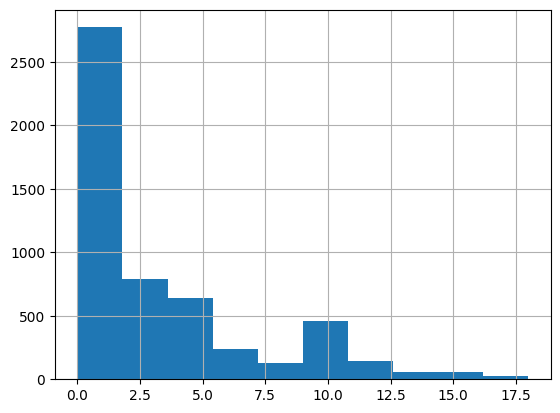

In [13]:
results.mrna_start.hist()

<Axes: >

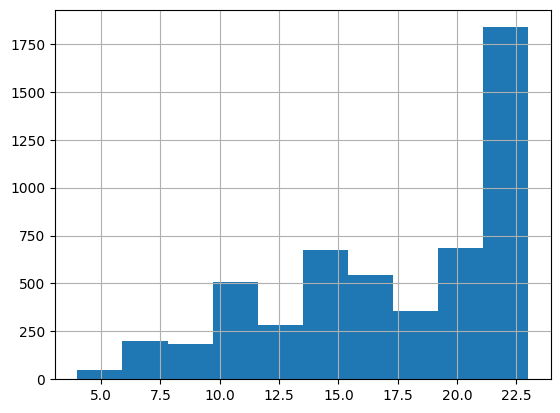

In [14]:
results.mrna_end.hist()


In [15]:
results_mutated = find_matches_for_vcfs(chr1[:2], mutated=True)

Processing row 0 in df with mirna_row MIMAT0000062 in mirna_df
Processing row 0 in df with mirna_row MIMAT0004481 in mirna_df
Processing row 0 in df with mirna_row MIMAT0010195 in mirna_df
Processing row 0 in df with mirna_row MIMAT0000063 in mirna_df
Processing row 0 in df with mirna_row MIMAT0004482 in mirna_df
Processing row 0 in df with mirna_row MIMAT0000064 in mirna_df
Processing row 0 in df with mirna_row MIMAT0026472 in mirna_df
Processing row 0 in df with mirna_row MIMAT0000065 in mirna_df
Processing row 0 in df with mirna_row MIMAT0004484 in mirna_df
Processing row 0 in df with mirna_row MIMAT0000066 in mirna_df
Processing row 0 in df with mirna_row MIMAT0004485 in mirna_df
Processing row 0 in df with mirna_row MIMAT0000067 in mirna_df
Processing row 0 in df with mirna_row MIMAT0004486 in mirna_df
Processing row 0 in df with mirna_row MIMAT0004487 in mirna_df
Processing row 0 in df with mirna_row MIMAT0000068 in mirna_df
Processing row 0 in df with mirna_row MIMAT0004488 in m

# merging result dataframes


In [16]:
results["is_mutated"] = 0
results_mutated["is_mutated"] = 1

results_mutated['id'] = results_mutated['id'].apply(
    lambda x: f"{x}_mutated"
)


In [17]:
final =pd.concat([results, results_mutated], axis=0)

final.tail()


,id,mrna_start,mrna_end,mrna_sequence,mirna_accession,mirna_start,mirna_end,mirna_sequence,mrna_dot_bracket_5to3,mirna_dot_bracket_5to3,pred_energy,is_mutated
5307,1_819245_G_T_MIMAT0049025_mutated,2,23,TCTGGATATTATCCCTTTGTCAG,MIMAT0049025,0,19,TTTGGAGAGGTGTACTCCCA,.(((...(((.(((((.((((,.))))))))).))).))).,-8.9,1
5308,1_819245_G_T_MIMAT0049026_mutated,8,23,TCTGGATATTATCCCTTTGTCAG,MIMAT0049026,7,22,TATTACTGTGAGAATTATGATG,.((((...((.(((.,.))).))....)))),-3.7,1
5309,1_819245_G_T_MIMAT0049027_mutated,16,23,TCTGGATATTATCCCTTTGTCAG,MIMAT0049027,0,8,CTTGGCACCATTAAAAAGTACA,.((((((,.)))))).,-4.5,1
5310,1_819245_G_T_MIMAT0049031_mutated,12,20,TCTGGATATTATCCCTTTGTCAG,MIMAT0049031,0,7,TAAAGGTTTGTTTGTAAA,.((((((.,)))))).,-5.2,1
5311,1_819245_G_T_MIMAT0049032_mutated,12,21,TCTGGATATTATCCCTTTGTCAG,MIMAT0049032,8,17,GAAAAAGTCATGGAGGCC,.(((((((.,.))))))).,-5.0,1


In [18]:
final.to_csv("results/7_results_of_first_5_rows.csv", index=False)